In [107]:
import pyspark as ps
from pyspark.sql.types import *
from pyspark.sql.functions import struct, col, when
from pyspark.sql.functions import lit
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})
import numpy as np

plt.style.use('ggplot')

In [108]:
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [109]:
df = spark.read.csv('data/dj_basin.csv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=",",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [110]:
df.printSchema()
print(df.count())

root
 |--   : string (nullable = true)
 |-- Formation: string (nullable = true)
 |-- SubFormation: string (nullable = true)
 |-- API: long (nullable = true)
 |-- TenDigitAPI: long (nullable = true)
 |-- WellName: string (nullable = true)
 |-- Operator: string (nullable = true)
 |-- HistoricOperator: string (nullable = true)
 |-- LeaseName: string (nullable = true)
 |-- County: string (nullable = true)
 |-- Section: integer (nullable = true)
 |-- Township: integer (nullable = true)
 |-- TownshipDirection: string (nullable = true)
 |-- Range: integer (nullable = true)
 |-- RangeDirection: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- OilGas: string (nullable = true)
 |-- IpTestDate: string (nullable = true)
 |-- IpOil: integer (nullable = true)
 |-- IpMCF: integer (nullable = true)
 |-- IpWtr: integer (nullable = true)
 |-- IpCondensate: integer (nullable = true)
 |-- IpWC: integer (null

 |-- Prod30DayOil: integer (nullable = true)
 |-- Prod60DayOil: integer (nullable = true)
 |-- Prod90DayOil: integer (nullable = true)
 |-- Prod180DayOil: integer (nullable = true)
 |-- Prod365DayOil: integer (nullable = true)
 |-- Prod545DayOil: integer (nullable = true)
 |-- Prod730DayOil: integer (nullable = true)
 |-- Prod1095DayOil: integer (nullable = true)
 |-- Prod1460DayOil: integer (nullable = true)
 |-- Prod1825DayOil: integer (nullable = true)

In [111]:
df.createOrReplaceTempView("data")

formation_df = spark.sql("""
                    SELECT 
                        api,
                        state,
                        UPPER(formation) AS formation, 
                        Prod30DayOil AS day30,
                        Prod60DayOil AS day60,
                        Prod90DayOil AS day90,
                        Prod180DayOil AS day180,
                        Prod365DayOil AS day365,
                        Prod545DayOil AS day545,
                        Prod730DayOil AS day730,
                        Prod1095DayOil AS day1095,
                        Prod1460DayOil AS day1460,
                        Prod1825DayOil AS day1825
                    FROM data
                    WHERE state = "COLORADO" AND formation = 'NIOBRARA'
                    """)
formation_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5069064360000|COLORADO| NIOBRARA|  292| 2182| 4246|  6239|  7773|  7859|  8810|   null|   null|   null|
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324860100|COLORADO| NIOBRARA| null|  206| 1435|  2

In [112]:
# fomation_df.na.replace({'Codell': 'CODELL'})
# fomation_df.na.replace({'Greenhorn': 'GREENHORN'})
# formation_df.schema.names

In [113]:
def production_plt(ax, x, y, title, xlab, ylab, color):
    ax.scatter(x_well, day, alpha= 0.5, color='red', s=10)
    ax.set_title(title, fontsize=35)
    ax.set_ylabel(xlab, fontsize=20)
    ax.set_xlabel(ylab, fontsize=20)


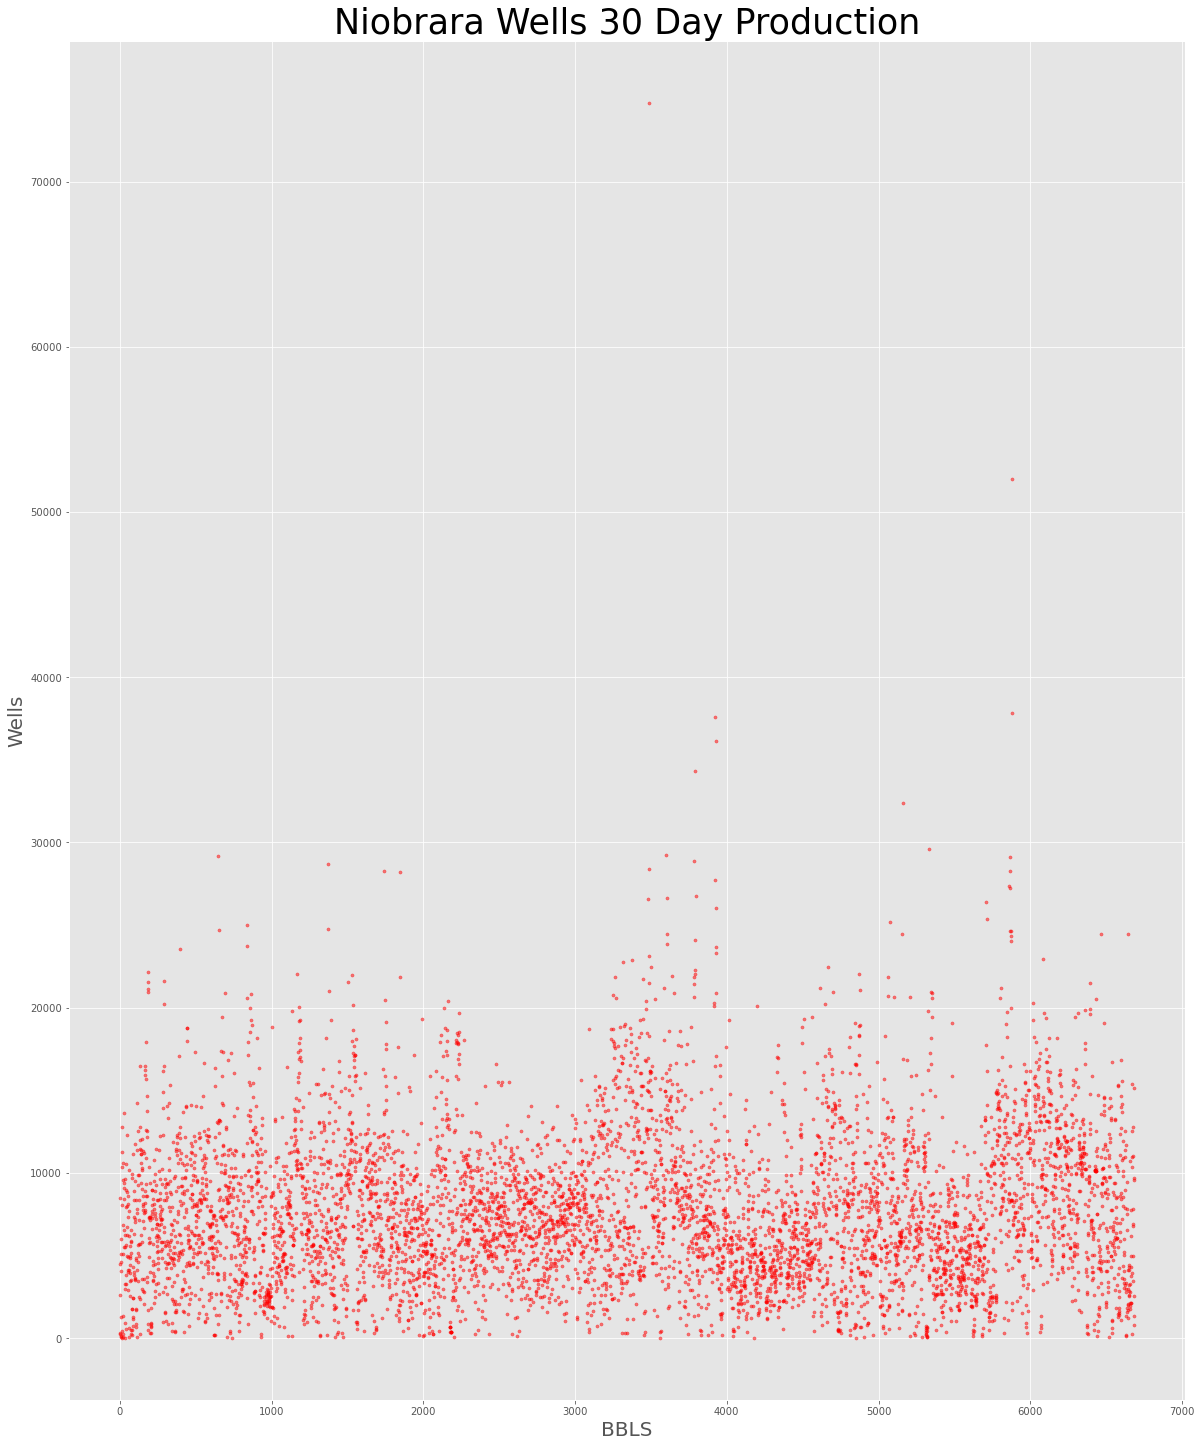

In [115]:
day30_df = formation_df.where(col("day30").isNotNull())
# day30_df.show()

day = day30_df.rdd.map(lambda y: y.day30).collect()
wells = day30_df.rdd.map(lambda x: x.formation).collect()
x_well = np.arange(0, len(wells))

fig, ax = plt.subplots(figsize = (20, 25))
production_plt(ax, x_well, wells, 'Niobrara Wells 30 Day Production', 'Wells', 'BBLS', 'red')
# ax.scatter(x_well, day, alpha= 0.5, color='red', s=10)
# ax.set_title('Niobrara Wells 30 Production', fontsize=35)
# ax.set_ylabel('BBLS', fontsize=20)
# ax.set_xlabel('Wells', fontsize=20)
plt.show()



In [22]:
day60_df = formation_df.na.drop(subset=["day30", "day60"])

day60_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5069064360000|COLORADO| NIOBRARA|  292| 2182| 4246|  6239|  7773|  7859|  8810|   null|   null|   null|
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2

In [23]:
day90_df = formation_df.na.drop(subset=["day30", "day60", "day90"])

day90_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5069064360000|COLORADO| NIOBRARA|  292| 2182| 4246|  6239|  7773|  7859|  8810|   null|   null|   null|
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2

In [24]:
day180_df = formation_df.na.drop(subset=["day30", "day60", "day90", "day180"])

day180_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5069064360000|COLORADO| NIOBRARA|  292| 2182| 4246|  6239|  7773|  7859|  8810|   null|   null|   null|
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2

In [25]:
day365_df = formation_df.na.drop(subset=["day30", "day60", "day90", "day180", "day365"])

day365_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5069064360000|COLORADO| NIOBRARA|  292| 2182| 4246|  6239|  7773|  7859|  8810|   null|   null|   null|
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2

In [26]:
day545_df = formation_df.na.drop(subset=["day30", "day60", "day90", "day180", "day365", "day545"])

day545_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5069064360000|COLORADO| NIOBRARA|  292| 2182| 4246|  6239|  7773|  7859|  8810|   null|   null|   null|
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2

In [27]:
day730_df = formation_df.na.drop(subset=["day30", "day60", "day90", "day180", "day365", "day545",
                                         "day730"])

day730_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5069064360000|COLORADO| NIOBRARA|  292| 2182| 4246|  6239|  7773|  7859|  8810|   null|   null|   null|
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2

In [28]:
day1095_df = formation_df.na.drop(subset=["day30", "day60", "day90", "day180", "day365", "day545",
                                         "day730", "day1095"])

day1095_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2977|  4704|  5428|  5915|   6972|   7538|   null|
|5123324890100|COLORADO| NIOBRARA|   38|  925| 2346|  4

In [29]:
day1460_df = formation_df.na.drop(subset=["day30", "day60", "day90", "day180", "day365", "day545",
                                         "day730", "day1095", "day1460"])

day1460_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123314470100|COLORADO| NIOBRARA|  228| 1336| 2140|  4661|  7982| 10260| 11514|  14186|  16916|   null|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123324870100|COLORADO| NIOBRARA|  118|  624| 1375|  2977|  4704|  5428|  5915|   6972|   7538|   null|
|5123324890100|COLORADO| NIOBRARA|   38|  925| 2346|  4

In [30]:
day1825_df = formation_df.na.drop(subset=["day30", "day60", "day90", "day180", "day365", "day545",
                                         "day730", "day1095", "day1460", "day1825"])

day1825_df.show()

+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|          api|   state|formation|day30|day60|day90|day180|day365|day545|day730|day1095|day1460|day1825|
+-------------+--------+---------+-----+-----+-----+------+------+------+------+-------+-------+-------+
|5087081610100|COLORADO| NIOBRARA| 4508| 8165| 9720| 14657| 20413| 22981| 25131|  28129|  30349|  32164|
|5123306860000|COLORADO| NIOBRARA| 8490|17373|23464| 33578| 45586| 52972| 58839|  67909|  73274|  78025|
|5123312210000|COLORADO| NIOBRARA| 2625| 4143| 5978|  9980| 13996| 16367| 18230|  21249|  23218|  24821|
|5123323680000|COLORADO| NIOBRARA| 4636| 7050| 9500| 17247| 28104| 36142| 40699|  47167|  49770|  51941|
|5123325010000|COLORADO| NIOBRARA| 5971| 9542|12076| 17942| 25091| 30017| 33302|  38903|  42854|  45952|
|5123327460100|COLORADO| NIOBRARA| 5110| 8786|11157| 15586| 20827| 24216| 26751|  31083|  34360|  37984|
|5123328120000|COLORADO| NIOBRARA| 1252| 8226|18029| 34

|-- Latitude: double (nullable = true)
|-- Longitude: double (nullable = true)

In [31]:
coorid_df = spark.sql("""
                    SELECT 
                        api,
                        State,
                        Latitude, 
                        Longitude
                    FROM data
                    WHERE State = 'COLORADO'
                    """)
coorid_df.show()

+-------------+--------+----------+------------+
|          api|   State|  Latitude|   Longitude|
+-------------+--------+----------+------------+
|5069064360000|COLORADO|40.8395791|-105.0018127|
|5087081610100|COLORADO|40.4234059|-104.1085912|
|5123306620000|COLORADO|40.7130352|-104.7683595|
|5123306860000|COLORADO| 40.337252|-104.7156774|
|5123309950100|COLORADO|40.6699689|-104.7509524|
|5123309960100|COLORADO|40.7490455|-104.8310469|
|5123312210000|COLORADO|40.9315953|-104.2791219|
|5123314470100|COLORADO|40.6968338|-104.7170118|
|5123323680000|COLORADO| 40.811546| -104.902546|
|5123324860100|COLORADO|40.5362909|-104.2767336|
|5123324870100|COLORADO|40.5691965|-104.2052552|
|5123324890100|COLORADO|40.5685238|-104.3192523|
|5123325010000|COLORADO|  40.94405| -104.367693|
|5123327460100|COLORADO|40.2214386|-104.6765437|
|5123328120000|COLORADO|40.6679018|-104.0932316|
|5123329100000|COLORADO|40.4927565|-104.3047292|
|5123329660000|COLORADO|  40.49591|-104.3245034|
|5123331000100|COLOR

In [32]:
# print(coorid_df.Latitude)

coorid_df = coorid_df.na.replace({104.8865041: -104.8865041})
coorid_df = coorid_df.na.drop(subset=["Latitude", "Longitude"])



latitude = coorid_df.rdd.map(lambda y: y.Latitude).collect()
longitude = coorid_df.rdd.map(lambda x: x.Longitude).collect()

x_lat = np.array(latitude)
y_long = np.array(longitude)

# print('MAX LAT: ', max(x_lat))
# print('MIN LAT: ', min(x_lat))
# print('MAX LONG: ', max(y_long))
# print('MIN LONG: ', min(y_long))

BBox = ((min(y_long), max(y_long),      
         min(x_lat), max(x_lat)))

map_ = plt.imread('images/map_clear.png')



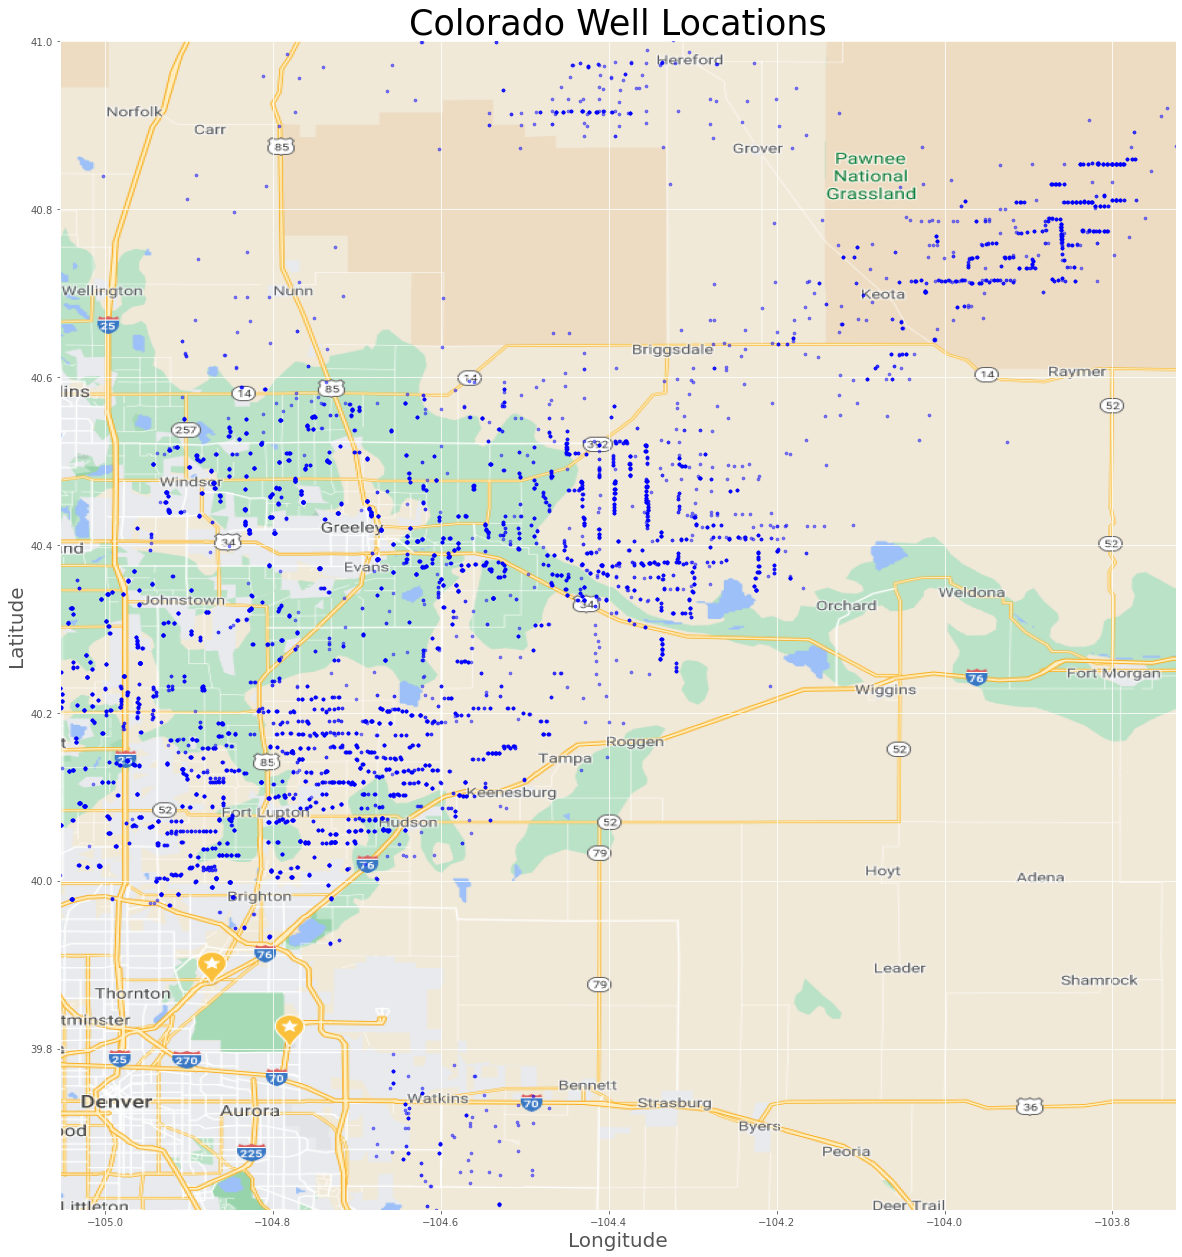

In [33]:
fig, ax = plt.subplots(figsize = (20, 25))

ax.scatter(y_long, x_lat, zorder=1, alpha= 0.5, color='blue', s=10)
ax.set_title('Colorado Well Locations', fontsize=35)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_, zorder=0, extent = BBox, aspect= 'equal')


plt.show()

In [102]:
fluid_df = spark.sql("""
                    SELECT
                        api,
                        State,
                        TotalCleanVol,
                        FluidVol1,
                        UPPER(FluidType1) AS fluid_type1,
                        FluidVol2,
                        UPPER(FluidType2) AS fluid_type2,
                        FluidVol3,
                        UPPER(FluidType3) AS fluid_type3,
                        FluidVol4,
                        UPPER(FluidType4) AS fluid_type4,
                        FluidVol5,
                        UPPER(FluidType5) AS fluid_type5
                    FROM data
                    WHERE State = 'COLORADO'
                    """)
# fluid_df.show()
# print(fluid_df.count())

HYBRID|X-LINK --------> HYBRID
X-LINK ---------------> GEL
ACID|OTHER FLUID -----> ACID
OTHER FLUID|WATER ----> WATER






In [103]:
fluid_df = fluid_df.where(col("fluid_type1").isNotNull())
wrong_fluid = ['HYBRID|X-LINK', 'X-LINK', 'ACID|OTHER FLUID', 'OTHER FLUID|WATER', 
               'HYBRID|LINEAR GEL', 'HYBRID|SLICKWATER', 'X-LINK|SLICKWATER', 'ACID|X-LINK', 'GEL|LINEAR GEL']
right_fluid = ['HYBRID', 'GEL', 'ACID', 'WATER', 'HYBRID', 'HYBRID', 'HYBRID', 'HYBRID', 'GEL']
for i in range(1,6):
    fluid_df = fluid_df.na.replace(wrong_fluid, right_fluid, 'fluid_type'+str(i))

for i in range(1,6):
    fluid_df = fluid_df.na.fill({'fluid_type'+str(i): ''})
    fluid_df = fluid_df.na.fill({'FluidVol'+str(i): 0})
    
fluid_df = fluid_df.na.drop(subset=["TotalCleanVol"])

fluid_df = fluid_df.distinct()

     df = df.withColumn('hybrid_collect', lit(0))
     df = df.withColumn('hybrid1', when(col('fluid_type1') == 'HYBRID', col('FluidVol1')).otherwise(0))
     df = df.withColumn('hybrid_collect', col('hybrid_collect') + col('hybrid1'))

In [104]:
def clean_fluid_type(df, fluid_sys):
    fluid_vol = 'FluidVol'
    fluid_type = 'fluid_type'
    lowcase_fluid = fluid_sys.lower() + "_collect"
    
    df = df.withColumn(lowcase_fluid, lit(0))
    for i in range(1, 6):
        df = df.withColumn(fluid_sys.lower()+str(i), when(col(fluid_type+str(i)) == fluid_sys, col(fluid_vol+str(i))).otherwise(0))
        df = df.withColumn(lowcase_fluid, col(lowcase_fluid) + col(fluid_sys.lower()+str(i)))

    return df


In [105]:
fluid_df = clean_fluid_type(fluid_df, 'HYBRID')
# fluid_df.show()
fluid_df = clean_fluid_type(fluid_df, 'SLICKWATER')
# fluid_df.show()
fluid_df = clean_fluid_type(fluid_df, 'GEL')
# fluid_df.show()

columns_to_drop = ['hybrid1', 'hybrid2', 'hybrid3', 'hybrid4', 'hybrid5',
                   'slickwater1', 'slickwater2', 'slickwater3', 'slickwater4', 'slickwater5',
                   'gel1', 'gel2', 'gel3', 'gel4', 'gel5',
                   'FluidVol1', 'fluid_type1','FluidVol2','fluid_type2', 'FluidVol3', 
                   'fluid_type3', 'FluidVol4', 'fluid_type4', 'FluidVol5', 'fluid_type5']
fluid_df = fluid_df.drop(*columns_to_drop)

In [106]:
fluid_df.show(50)

+-------------+--------+-------------+--------------+------------------+-----------+
|          api|   State|TotalCleanVol|hybrid_collect|slickwater_collect|gel_collect|
+-------------+--------+-------------+--------------+------------------+-----------+
|5123450470000|COLORADO|        97227|             0|             91186|          0|
|5123320810100|COLORADO|        17045|             0|              2173|       9574|
|5123403830000|COLORADO|       146513|             0|             64588|          0|
|5123376830000|COLORADO|       102024|             0|            102024|          0|
|5123360060000|COLORADO|       184744|             0|            160288|      21992|
|5123377060000|COLORADO|        65210|             0|             65210|          0|
|5123377340000|COLORADO|        65892|             0|             22832|      43060|
|5123440840000|COLORADO|       127878|             0|             31866|      94333|
|5123453750000|COLORADO|       366038|             0|            